In [1]:
import os
import numpy as np
import pandas as pd
import deepdish as dd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, roc_curve, auc, matthews_corrcoef, make_scorer

In [2]:
def report(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    ax = plt.subplot()
    sns.heatmap(cmn, annot=True, fmt=".4f", ax=ax)

    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["Low", "High"])
    ax.yaxis.set_ticklabels(["Low", "HIgh"])
    for text in ax.texts:
        text.set_size(13)
    plt.show()

    stats = precision_recall_fscore_support(y_test, y_pred, average=None)
    mcc = matthews_corrcoef(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    print("Precision: %.4f  %.4f" % tuple(stats[0]))
    print("Recall: %.4f  %.4f"  % tuple(stats[1]))
    print("F1-Score %.4f  %.4f"  % tuple(stats[2]))
    print("MCC %.4f" % mcc)
    print("AUROC %.4f" % roc_auc)

In [3]:
df_feat = pd.read_csv('../../datasets/dataset_extracted_features.csv')
test = dd.io.load('../../splits/test.h5')
test_features = df_feat.loc[(df_feat['Seq1'].isin([item[0] for item in test])) & (df_feat['Seq2'].isin([item[1] for item in test]))]
test_labels = test_features[['Label']].values.squeeze()

In [4]:
rf_preds = np.load('predictions_rf_aln_gc_mfe.npy')

In [5]:
nn_preds = np.load('predictions_nn_complete.npy')

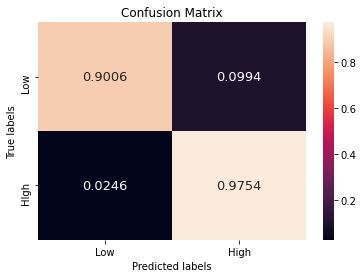

Precision: 0.9660  0.9265
Recall: 0.9006  0.9754
F1-Score 0.9322  0.9503
MCC 0.8842
AUROC 0.9380


In [6]:
report(test_labels, rf_preds)

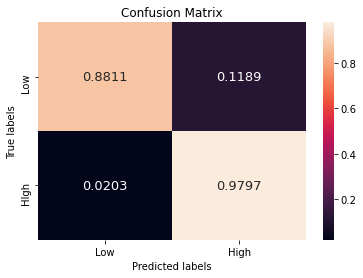

Precision: 0.9713  0.9137
Recall: 0.8811  0.9797
F1-Score 0.9240  0.9455
MCC 0.8728
AUROC 0.9304


In [7]:
report(test_labels, nn_preds)